In [13]:
import pandas as pd
import glob
import os

In [14]:
df_overall = pd.read_csv('overall_daily_oee.csv', parse_dates=["Date"])
df_overall.head()

,Date,Availability,Performance,Quality,OEE
0,2023-01-02,1.0,1.126069,1.0,1.126069
1,2023-01-03,1.0,1.051082,1.0,1.051082
2,2023-01-04,1.0,1.127245,1.0,1.127245
3,2023-01-05,1.0,1.240277,1.0,1.240277
4,2023-01-06,1.0,1.154885,1.0,1.154885


In [15]:
df_overall.dtypes

Date            datetime64[ns]
Availability           float64
Performance            float64
Quality                float64
OEE                    float64
dtype: object

In [16]:
line_report_pattern = "daily_oee_report_*.csv"
line_report_files = glob.glob(line_report_pattern)

per_line_dataframes = {}

if not line_report_files:
    print(f"\nNo per-line report files found matching the pattern: '{line_report_pattern}'")
    print("Please ensure files like 'daily_oee_report_Line A.csv' exist in the working directory.")
else:
    print(f"\nFound {len(line_report_files)} per-line report files:")
    for filepath in line_report_files:
        # Extract production line name from filename
        # e.g., "daily_oee_report_Line A.csv" -> "Line A"
        filename = os.path.basename(filepath)

        # A common way to extract the part between prefix and suffix:
        prefix = "daily_oee_report_"
        suffix = ".csv"
        if filename.startswith(prefix) and filename.endswith(suffix):
            production_line_name = filename[len(prefix):-len(suffix)]
        else:
            print(f"Warning: Filename '{filename}' doesn't strictly match expected pattern. Using fallback key.")
            production_line_name = os.path.splitext(filename)[0] # e.g., "daily_oee_report_Line A"

        # Read the CSV, ensuring the 'Date' column is parsed as datetime objects
        df_line = pd.read_csv(filepath, parse_dates=["Date"])
        per_line_dataframes[production_line_name] = df_line

        print(f"\nSuccessfully read: {filepath} (for Production Line: '{production_line_name}')")
        print(f"First 5 rows for '{production_line_name}' (df stored in per_line_dataframes['{production_line_name}']):")
        display(df_line.head())
        print(f"\nData types for '{production_line_name}':")
        print(df_line.dtypes)
        print("-" * 30)


Found 5 per-line report files:

Successfully read: daily_oee_report_LINE-01.csv (for Production Line: 'LINE-01')
First 5 rows for 'LINE-01' (df stored in per_line_dataframes['LINE-01']):


,PRODUCTION_LINE,Date,Planned_Production_Time_Seconds,Actual_Run_Time_Seconds,Total_Actual_Output,Ideal_Cycle_Time_Seconds,Availability,Performance,Quality,OEE
0,LINE-01,2023-01-02,14520.0,14520.0,1177,11.0,1.0,0.891667,1.0,0.891667
1,LINE-01,2023-01-03,24780.0,24780.0,1976,11.0,1.0,0.877159,1.0,0.877159
2,LINE-01,2023-01-04,24420.0,24420.0,1977,11.0,1.0,0.890541,1.0,0.890541
3,LINE-01,2023-01-05,24300.0,24300.0,1976,11.0,1.0,0.894486,1.0,0.894486
4,LINE-01,2023-01-06,18240.0,18240.0,1534,11.0,1.0,0.925110,1.0,0.925110



Data types for 'LINE-01':
PRODUCTION_LINE                            object
Date                               datetime64[ns]
Planned_Production_Time_Seconds           float64
Actual_Run_Time_Seconds                   float64
Total_Actual_Output                         int64
Ideal_Cycle_Time_Seconds                  float64
Availability                              float64
Performance                               float64
Quality                                   float64
OEE                                       float64
dtype: object
------------------------------

Successfully read: daily_oee_report_LINE-02.csv (for Production Line: 'LINE-02')
First 5 rows for 'LINE-02' (df stored in per_line_dataframes['LINE-02']):


,PRODUCTION_LINE,Date,Planned_Production_Time_Seconds,Actual_Run_Time_Seconds,Total_Actual_Output,Ideal_Cycle_Time_Seconds,Availability,Performance,Quality,OEE
0,LINE-02,2023-01-02,0.0,0.0,1179,11.0,0.0,0.0,1.0,0.0
1,LINE-02,2023-01-03,0.0,0.0,1975,11.0,0.0,0.0,1.0,0.0
2,LINE-02,2023-01-04,0.0,0.0,1965,11.0,0.0,0.0,1.0,0.0
3,LINE-02,2023-01-05,0.0,0.0,1971,11.0,0.0,0.0,1.0,0.0
4,LINE-02,2023-01-06,0.0,0.0,1535,11.0,0.0,0.0,1.0,0.0



Data types for 'LINE-02':
PRODUCTION_LINE                            object
Date                               datetime64[ns]
Planned_Production_Time_Seconds           float64
Actual_Run_Time_Seconds                   float64
Total_Actual_Output                         int64
Ideal_Cycle_Time_Seconds                  float64
Availability                              float64
Performance                               float64
Quality                                   float64
OEE                                       float64
dtype: object
------------------------------

Successfully read: daily_oee_report_LINE-03.csv (for Production Line: 'LINE-03')
First 5 rows for 'LINE-03' (df stored in per_line_dataframes['LINE-03']):


,PRODUCTION_LINE,Date,Planned_Production_Time_Seconds,Actual_Run_Time_Seconds,Total_Actual_Output,Ideal_Cycle_Time_Seconds,Availability,Performance,Quality,OEE
0,LINE-03,2023-01-02,38760.0,38760.0,6263,5.5,1.0,0.888713,1.0,0.888713
1,LINE-03,2023-01-03,21480.0,21480.0,3765,5.5,1.0,0.964036,1.0,0.964036
2,LINE-03,2023-01-04,23700.0,23700.0,4035,5.5,1.0,0.936392,1.0,0.936392
3,LINE-03,2023-01-05,47520.0,47520.0,7429,5.5,1.0,0.859838,1.0,0.859838
4,LINE-03,2023-01-06,15900.0,15900.0,2763,5.5,1.0,0.955755,1.0,0.955755



Data types for 'LINE-03':
PRODUCTION_LINE                            object
Date                               datetime64[ns]
Planned_Production_Time_Seconds           float64
Actual_Run_Time_Seconds                   float64
Total_Actual_Output                         int64
Ideal_Cycle_Time_Seconds                  float64
Availability                              float64
Performance                               float64
Quality                                   float64
OEE                                       float64
dtype: object
------------------------------

Successfully read: daily_oee_report_LINE-04.csv (for Production Line: 'LINE-04')
First 5 rows for 'LINE-04' (df stored in per_line_dataframes['LINE-04']):


,PRODUCTION_LINE,Date,Planned_Production_Time_Seconds,Actual_Run_Time_Seconds,Total_Actual_Output,Ideal_Cycle_Time_Seconds,Availability,Performance,Quality,OEE
0,LINE-04,2023-01-02,29760.0,29760.0,2140,11.0,1.0,0.790995,1.0,0.790995
1,LINE-04,2023-01-03,48180.0,48180.0,3760,11.0,1.0,0.858447,1.0,0.858447
2,LINE-04,2023-01-04,30240.0,30240.0,2517,11.0,1.0,0.915575,1.0,0.915575
3,LINE-04,2023-01-05,24660.0,24660.0,1856,11.0,1.0,0.827899,1.0,0.827899
4,LINE-04,2023-01-06,27240.0,27240.0,2131,11.0,1.0,0.860536,1.0,0.860536



Data types for 'LINE-04':
PRODUCTION_LINE                            object
Date                               datetime64[ns]
Planned_Production_Time_Seconds           float64
Actual_Run_Time_Seconds                   float64
Total_Actual_Output                         int64
Ideal_Cycle_Time_Seconds                  float64
Availability                              float64
Performance                               float64
Quality                                   float64
OEE                                       float64
dtype: object
------------------------------

Successfully read: daily_oee_report_LINE-06.csv (for Production Line: 'LINE-06')
First 5 rows for 'LINE-06' (df stored in per_line_dataframes['LINE-06']):


,PRODUCTION_LINE,Date,Planned_Production_Time_Seconds,Actual_Run_Time_Seconds,Total_Actual_Output,Ideal_Cycle_Time_Seconds,Availability,Performance,Quality,OEE
0,LINE-06,2023-01-02,35700.0,35700.0,2747,11.0,1.0,0.846415,1.0,0.846415
1,LINE-06,2023-01-03,46080.0,46080.0,3443,11.0,1.0,0.821897,1.0,0.821897
2,LINE-06,2023-01-04,44700.0,44700.0,3518,11.0,1.0,0.865727,1.0,0.865727
3,LINE-06,2023-01-05,24720.0,24720.0,1952,11.0,1.0,0.868608,1.0,0.868608
4,LINE-06,2023-01-06,24840.0,24840.0,2095,11.0,1.0,0.927738,1.0,0.927738



Data types for 'LINE-06':
PRODUCTION_LINE                            object
Date                               datetime64[ns]
Planned_Production_Time_Seconds           float64
Actual_Run_Time_Seconds                   float64
Total_Actual_Output                         int64
Ideal_Cycle_Time_Seconds                  float64
Availability                              float64
Performance                               float64
Quality                                   float64
OEE                                       float64
dtype: object
------------------------------


In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler # Or MinMaxScaler
# from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt # For any quick plots if needed

# --- Helper function to create sequences (ensure this is defined in your notebook) ---
# def create_sequences(data_1d, look_back, forecast_horizon=1):
#     X, y = [], []
#     if len(data_1d) <= look_back + forecast_horizon -1 :
#         return np.array(X), np.array(y)
#     for i in range(len(data_1d) - look_back - forecast_horizon + 1):
#         input_seq = data_1d[i:(i + look_back)]
#         output_val = data_1d[i + look_back : i + look_back + forecast_horizon]
#         X.append(input_seq)
#         y.append(output_val)
#     X = np.array(X)
#     if X.ndim == 2 and X.size > 0:
#         X = X.reshape((X.shape[0], X.shape[1], 1))
#     y = np.array(y)
#     if forecast_horizon == 1 and y.ndim > 1 and y.size > 0:
#         y = y.ravel()
#     return X, y
# Make sure your create_sequences function is available in the notebook's scope.

# --- Data Preparation Configuration ---
LOOK_BACK_VALUES = [7, 14, 19, 28] # Example look_back values
FORECAST_HORIZON = 3              # For single-step ahead prediction
TRAIN_SIZE_PERCENT = 0.7
VALIDATION_SIZE_PERCENT = 0.15
# TEST_SIZE_PERCENT will be the remainder

# --- Master Dictionary to Store All Prepared Data ---
all_prepared_data = {}

# --- Data Sources to Process (ASSUMING df_overall and per_line_dataframes are ALREADY POPULATED) ---
data_sources_to_process = {}

# Add Overall OEE data if it exists and is valid
if 'df_overall' in locals() and isinstance(df_overall, pd.DataFrame) and not df_overall.empty:
    data_sources_to_process['Overall'] = df_overall.copy() # Use a copy to avoid modifying original
else:
    print("Overall OEE data (`df_overall`) not available or empty, skipping preparation for 'Overall'.")

# Add Per-Line OEE data if it exists and is valid
if 'per_line_dataframes' in locals() and isinstance(per_line_dataframes, dict):
    for line_name, df_line in per_line_dataframes.items():
        if isinstance(df_line, pd.DataFrame) and not df_line.empty:
            data_sources_to_process[line_name] = df_line.copy() # Use a copy
        else:
            print(f"Data for {line_name} in `per_line_dataframes` not available or empty, skipping preparation.")
else:
    print("Per-line OEE data (`per_line_dataframes`) not available, skipping per-line preparation.")


# --- Main Preparation Loop ---
if not data_sources_to_process:
    print("No valid data sources found to process. Halting preparation.")
else:
    print(f"\n\n{'='*20} STARTING DATA PREPARATION FOR {len(data_sources_to_process)} SOURCES {'='*20}")

    for source_name, source_df_original in data_sources_to_process.items():
        print(f"\n\n--- Preparing data for: {source_name} ---")
        current_prepared_data = {}
        source_df = source_df_original.copy() # Work on a copy within the loop

        if 'OEE' not in source_df.columns:
            print(f"  Error: 'OEE' column not found in data for {source_name}. Skipping.")
            continue
        if 'Date' not in source_df.columns:
            print(f"  Error: 'Date' column not found in data for {source_name}. Skipping.")
            continue

        # Ensure 'Date' is datetime and sort
        source_df['Date'] = pd.to_datetime(source_df['Date'])
        source_df = source_df.sort_values('Date').reset_index(drop=True)
        oee_data_current = source_df.set_index('Date')['OEE'].dropna()

        if oee_data_current.empty:
            print(f"  Error: OEE data for {source_name} is empty after dropping NaNs. Skipping.")
            continue

        print(f"  Original data length for {source_name}: {len(oee_data_current)}")

        # --- Train/Val/Test Split (on the 1D series) ---
        n = len(oee_data_current)
        train_end_idx = int(n * TRAIN_SIZE_PERCENT)
        val_end_idx = train_end_idx + int(n * VALIDATION_SIZE_PERCENT)

        train_data_orig = oee_data_current.iloc[:train_end_idx]
        val_data_orig = oee_data_current.iloc[train_end_idx:val_end_idx]
        test_data_orig = oee_data_current.iloc[val_end_idx:]
        print(f"  Train size: {len(train_data_orig)}, Val size: {len(val_data_orig)}, Test size: {len(test_data_orig)}")

        if not all(len(s) > 0 for s in [train_data_orig, val_data_orig, test_data_orig]):
            print(f"  Error: One of the data splits for {source_name} is empty. Minimum data points required for splits. Skipping {source_name}.")
            continue
        if len(train_data_orig) < min(LOOK_BACK_VALUES) + FORECAST_HORIZON: # Check if train data is enough for smallest look_back
            print(f"  Warning: Training data for {source_name} ({len(train_data_orig)} points) is too short for the smallest look_back value + forecast horizon. Sequencing might result in empty arrays.")
            # continue # Optionally skip if too short


        # --- Scaling ---
        scaler = RobustScaler()
        train_data_reshaped = train_data_orig.values.reshape(-1, 1)
        scaler.fit(train_data_reshaped) # Fit ONLY on training data
        current_prepared_data['scaler'] = scaler

        train_scaled_1d = scaler.transform(train_data_reshaped).flatten()
        # Ensure val/test data are not empty before transforming
        val_scaled_1d = scaler.transform(val_data_orig.values.reshape(-1, 1)).flatten() if not val_data_orig.empty else np.array([])
        test_scaled_1d = scaler.transform(test_data_orig.values.reshape(-1, 1)).flatten() if not test_data_orig.empty else np.array([])

        current_prepared_data['scaled_splits_1d'] = {
            'train': train_scaled_1d, 'val': val_scaled_1d, 'test': test_scaled_1d
        }
        print(f"  Scaled 1D - Train: {len(train_scaled_1d)}, Val: {len(val_scaled_1d)}, Test: {len(test_scaled_1d)}")

        # --- Sequence Creation for Different Look-Backs ---
        for look_back in LOOK_BACK_VALUES:
            print(f"    Creating sequences for look_back = {look_back}...")

            # Train sequences
            X_train, y_train = create_sequences(train_scaled_1d, look_back, FORECAST_HORIZON)

            # Validation sequences
            val_input_data_for_seq = np.array([])
            if len(train_scaled_1d) >= look_back and len(val_scaled_1d) > 0 :
                val_input_data_for_seq = np.concatenate([train_scaled_1d[-look_back:], val_scaled_1d])
            elif len(val_scaled_1d) > 0: # If train is too short, just use val data (might miss initial sequences)
                val_input_data_for_seq = val_scaled_1d
            X_val, y_val = create_sequences(val_input_data_for_seq, look_back, FORECAST_HORIZON)


            # Test sequences
            test_input_data_for_seq = np.array([])
            # Use combined train+val to form history for test sequences for robustness
            combined_train_val_scaled_1d = np.concatenate([train_scaled_1d, val_scaled_1d])
            if len(combined_train_val_scaled_1d) >= look_back and len(test_scaled_1d) > 0:
                test_input_data_for_seq = np.concatenate([combined_train_val_scaled_1d[-look_back:], test_scaled_1d])
            elif len(test_scaled_1d) > 0: # If combined history is too short, just use test data
                test_input_data_for_seq = test_scaled_1d
            X_test, y_test = create_sequences(test_input_data_for_seq, look_back, FORECAST_HORIZON)

            current_prepared_data[look_back] = {
                'X_train': X_train, 'y_train': y_train,
                'X_val': X_val, 'y_val': y_val,
                'X_test': X_test, 'y_test': y_test
            }
            print(f"      Look_back {look_back}: X_train: {X_train.shape}, X_val: {X_val.shape}, X_test: {X_test.shape}")
            # A more robust check for empty arrays after sequencing
            if any(arr.size == 0 for arr_list in [(X_train, y_train), (X_val, y_val), (X_test, y_test)] for arr in arr_list if isinstance(arr, np.ndarray)):
                 print(f"        WARNING: One or more sequence arrays (X or y for train/val/test) are empty for look_back={look_back}. "
                       f"This usually means the corresponding 1D split was too short for this look_back value plus forecast horizon.")


        all_prepared_data[source_name] = current_prepared_data
        print(f"--- Data Preparation for {source_name} Complete ---")

print("\n\n{'='*30} ALL DATA PREPARATION COMPLETE {'='*30}")

# --- Example: Accessing Prepared Data ---
if 'Overall' in all_prepared_data:
    print("\nExample: Accessing 'Overall' prepared data:")
    if 'scaler' in all_prepared_data['Overall']:
        print("  Scaler:", type(all_prepared_data['Overall']['scaler']))
    if 'scaled_splits_1d' in all_prepared_data['Overall']:
        print("  1D Train scaled split shape:", all_prepared_data['Overall']['scaled_splits_1d']['train'].shape)
    # Check if a specific look_back (e.g., 14) was processed and has data
    if 14 in all_prepared_data['Overall'] and 'X_train' in all_prepared_data['Overall'][14]:
        print("  Sequenced X_train for look_back 14 shape:", all_prepared_data['Overall'][14]['X_train'].shape)

# Example for LINE-01 if it was processed
first_line_key = next(iter(per_line_dataframes.keys()), None) if per_line_dataframes else None
if first_line_key and first_line_key in all_prepared_data:
    print(f"\nExample: Accessing '{first_line_key}' prepared data:")
    if 'scaler' in all_prepared_data[first_line_key]:
        print("  Scaler:", type(all_prepared_data[first_line_key]['scaler']))
    if 'scaled_splits_1d' in all_prepared_data[first_line_key]:
        print("  1D Val scaled split shape:", all_prepared_data[first_line_key]['scaled_splits_1d']['val'].shape)
    if 7 in all_prepared_data[first_line_key] and 'X_test' in all_prepared_data[first_line_key][7]:
        print("  Sequenced X_test for look_back 7 shape:", all_prepared_data[first_line_key][7]['X_test'].shape)



==================== STARTING DATA PREPARATION FOR 6 SOURCES ====================


--- Preparing data for: Overall ---
  Original data length for Overall: 258
  Train size: 180, Val size: 38, Test size: 40
  Scaled 1D - Train: 180, Val: 38, Test: 40
    Creating sequences for look_back = 7...
      Look_back 7: X_train: (171, 7, 1), X_val: (36, 7, 1), X_test: (38, 7, 1)
    Creating sequences for look_back = 14...
      Look_back 14: X_train: (164, 14, 1), X_val: (36, 14, 1), X_test: (38, 14, 1)
    Creating sequences for look_back = 19...
      Look_back 19: X_train: (159, 19, 1), X_val: (36, 19, 1), X_test: (38, 19, 1)
    Creating sequences for look_back = 28...
      Look_back 28: X_train: (150, 28, 1), X_val: (36, 28, 1), X_test: (38, 28, 1)
--- Data Preparation for Overall Complete ---


--- Preparing data for: LINE-01 ---
  Original data length for LINE-01: 256
  Train size: 179, Val size: 38, Test size: 39
  Scaled 1D - Train: 179, Val: 38, Test: 39
    Creating sequences fo

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, Masking

def build_stacked_simplernn_with_masking(input_shape_padded, units_list=[50, 30], dropout_rate=0.2):
    """
    Builds a stacked SimpleRNN model WITH a Masking layer.
    The Masking layer handles padded sequences by ignoring timesteps where all features are 0.

    Args:
        input_shape_padded (tuple): Shape of the input sequences, e.g., (MAX_PADDED_LENGTH, 1).
                                    The Masking layer will be the first layer and use this.
        units_list (list): A list of integers, where each integer is the number of units
                           for a SimpleRNN layer. Example: [64, 32] for two layers.
        dropout_rate (float): Dropout rate to apply after each SimpleRNN layer.

    Returns:
        tf.keras.models.Sequential: A Keras Sequential model.
    """
    model = Sequential(name=f"StackedSimpleRNN_Padded_MaskingTrue_Units{'_'.join(map(str, units_list))}")

    # Masking layer ignores timesteps where all features are 0 (our padding value)
    # It MUST be the first layer.
    model.add(Masking(mask_value=0., input_shape=input_shape_padded))

    # Subsequent layers don't need input_shape if Masking is the first layer
    for i, units in enumerate(units_list):
        is_last_rnn_in_stack = (i == len(units_list) - 1)
        model.add(SimpleRNN(
            units,
            activation='tanh', # Using tanh as in your original
            return_sequences=not is_last_rnn_in_stack # Only last RNN in stack returns single vector
        ))
        model.add(Dropout(dropout_rate)) # Dropout after each RNN layer

    model.add(Dense(FORECAST_HORIZON, activation='linear')) # Output layer, linear for regression
    return model


def build_stacked_simplernn_no_masking(input_shape_padded, units_list=[50, 30], dropout_rate=0.2):
    """
    Builds a stacked SimpleRNN model WITHOUT a Masking layer.
    This model assumes the input sequences might be padded but will process all timesteps.

    Args:
        input_shape_padded (tuple): Shape of the input sequences, e.g., (MAX_PADDED_LENGTH, 1).
                                    The first SimpleRNN layer will use this.
        units_list (list): A list of integers, where each integer is the number of units
                           for a SimpleRNN layer. Example: [64, 32] for two layers.
        dropout_rate (float): Dropout rate to apply after each SimpleRNN layer.

    Returns:
        tf.keras.models.Sequential: A Keras Sequential model.
    """
    model = Sequential(name=f"StackedSimpleRNN_Padded_MaskingFalse_Units{'_'.join(map(str, units_list))}")

    # First SimpleRNN layer needs the input_shape
    model.add(SimpleRNN(
        units_list[0],
        activation='tanh', # Using tanh
        input_shape=input_shape_padded,
        return_sequences=True if len(units_list) > 1 else False
    ))
    model.add(Dropout(dropout_rate))

    # Subsequent SimpleRNN layers
    for i in range(1, len(units_list)):
        is_last_rnn_in_stack = (i == len(units_list) - 1)
        model.add(SimpleRNN(
            units_list[i],
            activation='tanh', # Using tanh
            return_sequences=not is_last_rnn_in_stack
        ))
        model.add(Dropout(dropout_rate))

    model.add(Dense(FORECAST_HORIZON, activation='linear')) # Output layer, linear for regression
    return model

# --- Example Usage (assuming FORECAST_HORIZON is defined) ---
MAX_PADDED_LENGTH = 20 # Example
N_FEATURES = 1       # Univariate

example_input_shape = (MAX_PADDED_LENGTH, N_FEATURES)
custom_units = [64, 32, 16]
custom_dropout = 0.25

# Model WITH Masking
print("--- Model with Masking ---")
model_with_masking = build_stacked_simplernn_with_masking(
    input_shape_padded=example_input_shape,
    units_list=custom_units,
    dropout_rate=custom_dropout
)
model_with_masking.summary()

print("\n--- Model WITHOUT Masking ---")
# Model WITHOUT Masking
model_no_masking = build_stacked_simplernn_no_masking(
    input_shape_padded=example_input_shape,
    units_list=custom_units,
    dropout_rate=custom_dropout
)
model_no_masking.summary()

--- Model with Masking ---


C:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\core\masking.py:47: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "StackedSimpleRNN_Padded_MaskingTrue_Units64_32_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ masking (Masking)                    │ (None, 20, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ (None, 20, 64)              │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 20, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 20, 32)              │           3,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 20, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ (None, 16)                  │             784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,129 (31.75 KB)

 Trainable params: 8,129 (31.75 KB)

 Non-trainable params: 0 (0.00 B)


--- Model WITHOUT Masking ---


C:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "StackedSimpleRNN_Padded_MaskingFalse_Units64_32_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_3 (SimpleRNN)             │ (None, 20, 64)              │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 20, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_4 (SimpleRNN)             │ (None, 20, 32)              │           3,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 20, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_5 (SimpleRNN)             │ (None, 16)                  │             784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,129 (31.75 KB)

 Trainable params: 8,129 (31.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler # Or MinMaxScaler
# from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import pad_sequences # Import for padding
import matplotlib.pyplot as plt # For any quick plots if needed

# --- Helper function to create sequences (ensure this is defined in your notebook) ---
# def create_sequences(data_1d, look_back, forecast_horizon=1):
#     # ... (your existing create_sequences function) ...
#     # Ensure it returns X as 3D [samples, look_back, 1]
#     # and y as 1D [samples] or 2D [samples, forecast_horizon]
#     X, y = [], []
#     if len(data_1d) <= look_back + forecast_horizon -1 :
#         return np.array(X), np.array(y)
#     for i in range(len(data_1d) - look_back - forecast_horizon + 1):
#         input_seq = data_1d[i:(i + look_back)]
#         output_val = data_1d[i + look_back : i + look_back + forecast_horizon]
#         X.append(input_seq)
#         y.append(output_val)
#     X = np.array(X)
#     if X.ndim == 2 and X.size > 0: # If X is [samples, steps]
#         X = X.reshape((X.shape[0], X.shape[1], 1)) # Reshape to [samples, steps, features=1]
#     y = np.array(y)
#     if forecast_horizon == 1 and y.ndim > 1 and y.size > 0:
#         y = y.ravel()
#     return X, y
# Make sure your create_sequences function is available.


# --- Data Preparation Configuration ---
# === KEY DECISIONS ===
SELECTED_LOOK_BACK = 7    # Choose the single look_back window you want to use
TARGET_PADDED_LENGTH = 35  # Choose the final length all sequences will be padded to
                           # Ensure TARGET_PADDED_LENGTH >= SELECTED_LOOK_BACK
# ====================

FORECAST_HORIZON = 1      # For single-step ahead prediction (standard for this type of setup)
TRAIN_SIZE_PERCENT = 0.7
VALIDATION_SIZE_PERCENT = 0.15
N_FEATURES = 1            # Univariate time series

if TARGET_PADDED_LENGTH < SELECTED_LOOK_BACK:
    raise ValueError(f"TARGET_PADDED_LENGTH ({TARGET_PADDED_LENGTH}) must be greater than or equal to SELECTED_LOOK_BACK ({SELECTED_LOOK_BACK}).")


# --- Master Dictionary to Store All Prepared Data ---
all_prepared_data = {}

# --- Data Sources to Process (ASSUMING df_overall and per_line_dataframes are ALREADY POPULATED) ---
data_sources_to_process = {}
if 'df_overall' in locals() and isinstance(df_overall, pd.DataFrame) and not df_overall.empty:
    data_sources_to_process['Overall'] = df_overall.copy()
else:
    print("Overall OEE data (`df_overall`) not available or empty, skipping.")
if 'per_line_dataframes' in locals() and isinstance(per_line_dataframes, dict):
    for line_name, df_line in per_line_dataframes.items():
        if isinstance(df_line, pd.DataFrame) and not df_line.empty:
            data_sources_to_process[line_name] = df_line.copy()
        else:
            print(f"Data for {line_name} in `per_line_dataframes` not available or empty, skipping.")
else:
    print("Per-line OEE data (`per_line_dataframes`) not available, skipping.")


# --- Main Preparation Loop ---
if not data_sources_to_process:
    print("No valid data sources found to process. Halting preparation.")
else:
    print(f"\n\n{'='*20} STARTING DATA PREPARATION FOR {len(data_sources_to_process)} SOURCES {'='*20}")
    print(f"Using SELECTED_LOOK_BACK = {SELECTED_LOOK_BACK} and TARGET_PADDED_LENGTH = {TARGET_PADDED_LENGTH}")

    for source_name, source_df_original in data_sources_to_process.items():
        print(f"\n\n--- Preparing data for: {source_name} ---")
        current_prepared_data = {} # This will be the value for all_prepared_data[source_name]
        source_df = source_df_original.copy()

        if 'OEE' not in source_df.columns or 'Date' not in source_df.columns:
            print(f"  Error: 'OEE' or 'Date' column not found for {source_name}. Skipping.")
            continue

        source_df['Date'] = pd.to_datetime(source_df['Date'])
        source_df = source_df.sort_values('Date').reset_index(drop=True)
        oee_data_current = source_df.set_index('Date')['OEE'].dropna()

        if oee_data_current.empty:
            print(f"  Error: OEE data for {source_name} is empty. Skipping.")
            continue
        print(f"  Original data length for {source_name}: {len(oee_data_current)}")

        n = len(oee_data_current)
        train_end_idx = int(n * TRAIN_SIZE_PERCENT)
        val_end_idx = train_end_idx + int(n * VALIDATION_SIZE_PERCENT)
        train_data_orig = oee_data_current.iloc[:train_end_idx]
        val_data_orig = oee_data_current.iloc[train_end_idx:val_end_idx]
        test_data_orig = oee_data_current.iloc[val_end_idx:]

        print(f"  Train size: {len(train_data_orig)}, Val size: {len(val_data_orig)}, Test size: {len(test_data_orig)}")

        if not all(len(s) > 0 for s in [train_data_orig, val_data_orig, test_data_orig]):
            print(f"  Error: Data split for {source_name} resulted in empty set. Skipping.")
            continue
        if len(train_data_orig) < SELECTED_LOOK_BACK + FORECAST_HORIZON:
            print(f"  Warning: Training data for {source_name} ({len(train_data_orig)} points) is too short for SELECTED_LOOK_BACK={SELECTED_LOOK_BACK} + FORECAST_HORIZON={FORECAST_HORIZON}. Sequencing might result in empty arrays.")
            # continue # Optionally skip

        scaler = RobustScaler()
        train_data_reshaped = train_data_orig.values.reshape(-1, 1)
        scaler.fit(train_data_reshaped)
        current_prepared_data['scaler'] = scaler

        train_scaled_1d = scaler.transform(train_data_reshaped).flatten()
        val_scaled_1d = scaler.transform(val_data_orig.values.reshape(-1, 1)).flatten() if not val_data_orig.empty else np.array([])
        test_scaled_1d = scaler.transform(test_data_orig.values.reshape(-1, 1)).flatten() if not test_data_orig.empty else np.array([])
        current_prepared_data['scaled_splits_1d'] = {
            'train': train_scaled_1d, 'val': val_scaled_1d, 'test': test_scaled_1d
        }
        print(f"  Scaled 1D - Train: {len(train_scaled_1d)}, Val: {len(val_scaled_1d)}, Test: {len(test_scaled_1d)}")

        # --- Sequence Creation (using SELECTED_LOOK_BACK) ---
        print(f"    Creating sequences with look_back = {SELECTED_LOOK_BACK}...")
        X_train_orig_seq, y_train = create_sequences(train_scaled_1d, SELECTED_LOOK_BACK, FORECAST_HORIZON)

        val_input_data_for_seq = np.array([])
        if len(train_scaled_1d) >= SELECTED_LOOK_BACK and len(val_scaled_1d) > 0 :
            val_input_data_for_seq = np.concatenate([train_scaled_1d[-SELECTED_LOOK_BACK:], val_scaled_1d])
        elif len(val_scaled_1d) > 0:
            val_input_data_for_seq = val_scaled_1d
        X_val_orig_seq, y_val = create_sequences(val_input_data_for_seq, SELECTED_LOOK_BACK, FORECAST_HORIZON)

        test_input_data_for_seq = np.array([])
        combined_train_val_scaled_1d = np.concatenate([train_scaled_1d, val_scaled_1d])
        if len(combined_train_val_scaled_1d) >= SELECTED_LOOK_BACK and len(test_scaled_1d) > 0:
            test_input_data_for_seq = np.concatenate([combined_train_val_scaled_1d[-SELECTED_LOOK_BACK:], test_scaled_1d])
        elif len(test_scaled_1d) > 0:
            test_input_data_for_seq = test_scaled_1d
        X_test_orig_seq, y_test = create_sequences(test_input_data_for_seq, SELECTED_LOOK_BACK, FORECAST_HORIZON)

        print(f"      Original Sequences (look_back {SELECTED_LOOK_BACK}): "
              f"X_train: {X_train_orig_seq.shape}, X_val: {X_val_orig_seq.shape}, X_test: {X_test_orig_seq.shape}")

        # --- Apply Static Padding to the X sequences ---
        print(f"    Padding sequences to TARGET_PADDED_LENGTH = {TARGET_PADDED_LENGTH}...")
        X_train_to_pad = np.squeeze(X_train_orig_seq, axis=-1) if X_train_orig_seq.ndim == 3 and X_train_orig_seq.shape[-1] == 1 else X_train_orig_seq
        X_val_to_pad = np.squeeze(X_val_orig_seq, axis=-1) if X_val_orig_seq.ndim == 3 and X_val_orig_seq.shape[-1] == 1 else X_val_orig_seq
        X_test_to_pad = np.squeeze(X_test_orig_seq, axis=-1) if X_test_orig_seq.ndim == 3 and X_test_orig_seq.shape[-1] == 1 else X_test_orig_seq

        X_train_padded = pad_sequences(X_train_to_pad, maxlen=TARGET_PADDED_LENGTH, padding='pre', truncating='pre', dtype='float32', value=0.0) if X_train_to_pad.size > 0 else np.array([])
        X_val_padded = pad_sequences(X_val_to_pad, maxlen=TARGET_PADDED_LENGTH, padding='pre', truncating='pre', dtype='float32', value=0.0) if X_val_to_pad.size > 0 else np.array([])
        X_test_padded = pad_sequences(X_test_to_pad, maxlen=TARGET_PADDED_LENGTH, padding='pre', truncating='pre', dtype='float32', value=0.0) if X_test_to_pad.size > 0 else np.array([])

        if X_train_padded.size > 0: X_train_padded = X_train_padded.reshape((X_train_padded.shape[0], TARGET_PADDED_LENGTH, N_FEATURES))
        if X_val_padded.size > 0:   X_val_padded = X_val_padded.reshape((X_val_padded.shape[0], TARGET_PADDED_LENGTH, N_FEATURES))
        if X_test_padded.size > 0:  X_test_padded = X_test_padded.reshape((X_test_padded.shape[0], TARGET_PADDED_LENGTH, N_FEATURES))

        # Store the final padded sequences and corresponding y values
        current_prepared_data['X_train_padded'] = X_train_padded
        current_prepared_data['y_train'] = y_train
        current_prepared_data['X_val_padded'] = X_val_padded
        current_prepared_data['y_val'] = y_val
        current_prepared_data['X_test_padded'] = X_test_padded
        current_prepared_data['y_test'] = y_test
        current_prepared_data['selected_look_back'] = SELECTED_LOOK_BACK # Store for reference
        current_prepared_data['target_padded_length'] = TARGET_PADDED_LENGTH # Store for reference

        print(f"      Padded Sequences (to {TARGET_PADDED_LENGTH}): "
              f"X_train_padded: {X_train_padded.shape}, X_val_padded: {X_val_padded.shape}, X_test_padded: {X_test_padded.shape}")

        if any(arr.size == 0 for arr_list in [(X_train_padded, y_train), (X_val_padded, y_val), (X_test_padded, y_test)] for arr in arr_list if isinstance(arr, np.ndarray)):
             print(f"        WARNING: One or more final arrays (padded X or y) are empty. "
                   f"This might happen if initial splits were too small for SELECTED_LOOK_BACK={SELECTED_LOOK_BACK}.")

        all_prepared_data[source_name] = current_prepared_data
        print(f"--- Data Preparation for {source_name} Complete ---")

print("\n\n{'='*30} ALL DATA PREPARATION (WITH FOCUSED LOOK_BACK AND PADDING) COMPLETE {'='*30}")

# --- Example: Accessing Prepared Data ---
if 'Overall' in all_prepared_data:
    print("\nExample: Accessing 'Overall' prepared data:")
    prepared_overall = all_prepared_data['Overall']
    if 'scaler' in prepared_overall: print("  Scaler:", type(prepared_overall['scaler']))
    if 'scaled_splits_1d' in prepared_overall: print("  1D Train scaled split shape:", prepared_overall['scaled_splits_1d']['train'].shape)
    if 'X_train_padded' in prepared_overall:
        print("  Padded X_train shape:", prepared_overall['X_train_padded'].shape)
        print("  Original look_back used:", prepared_overall['selected_look_back'])
        print("  Padded to length:", prepared_overall['target_padded_length'])
        print("  Corresponding y_train shape:", prepared_overall['y_train'].shape)


first_line_key = next(iter(per_line_dataframes.keys()), None) if 'per_line_dataframes' in locals() and per_line_dataframes else None
if first_line_key and first_line_key in all_prepared_data:
    print(f"\nExample: Accessing '{first_line_key}' prepared data:")
    prepared_line = all_prepared_data[first_line_key]
    if 'X_test_padded' in prepared_line:
        print("  Padded X_test shape:", prepared_line['X_test_padded'].shape)
        print("  Original look_back used:", prepared_line['selected_look_back'])
        print("  Padded to length:", prepared_line['target_padded_length'])



==================== STARTING DATA PREPARATION FOR 6 SOURCES ====================
Using SELECTED_LOOK_BACK = 7 and TARGET_PADDED_LENGTH = 35


--- Preparing data for: Overall ---
  Original data length for Overall: 258
  Train size: 180, Val size: 38, Test size: 40
  Scaled 1D - Train: 180, Val: 38, Test: 40
    Creating sequences with look_back = 7...
      Original Sequences (look_back 7): X_train: (173, 7, 1), X_val: (38, 7, 1), X_test: (40, 7, 1)
    Padding sequences to TARGET_PADDED_LENGTH = 35...
      Padded Sequences (to 35): X_train_padded: (173, 35, 1), X_val_padded: (38, 35, 1), X_test_padded: (40, 35, 1)
--- Data Preparation for Overall Complete ---


--- Preparing data for: LINE-01 ---
  Original data length for LINE-01: 256
  Train size: 179, Val size: 38, Test size: 39
  Scaled 1D - Train: 179, Val: 38, Test: 39
    Creating sequences with look_back = 7...
      Original Sequences (look_back 7): X_train: (172, 7, 1), X_val: (38, 7, 1), X_test: (39, 7, 1)
    Padding s



========================= PROCESSING SOURCE: Overall =========================

--- Evaluating StackedSimpleRNN_Masking_LB14_PadTo20 with Walk-Forward for Overall ---


C:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\core\masking.py:47: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



StackedSimpleRNN_Masking_LB14_PadTo20 - Walk-Forward Metrics (Original Scale) for Overall:
  MAE: 0.0947, RMSE: 0.1905, MAPE: 698.01%


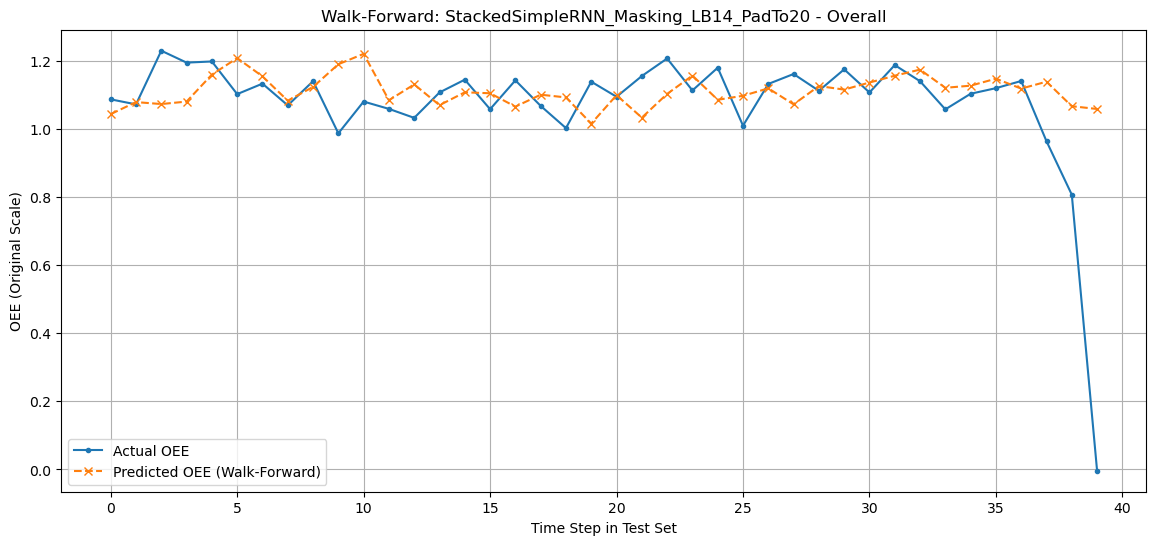



========================= PROCESSING SOURCE: LINE-01 =========================

--- Evaluating StackedSimpleRNN_Masking_LB14_PadTo20 with Walk-Forward for LINE-01 ---


C:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\core\masking.py:47: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



StackedSimpleRNN_Masking_LB14_PadTo20 - Walk-Forward Metrics (Original Scale) for LINE-01:
  MAE: 0.1757, RMSE: 0.2206, MAPE: 203004667.34%


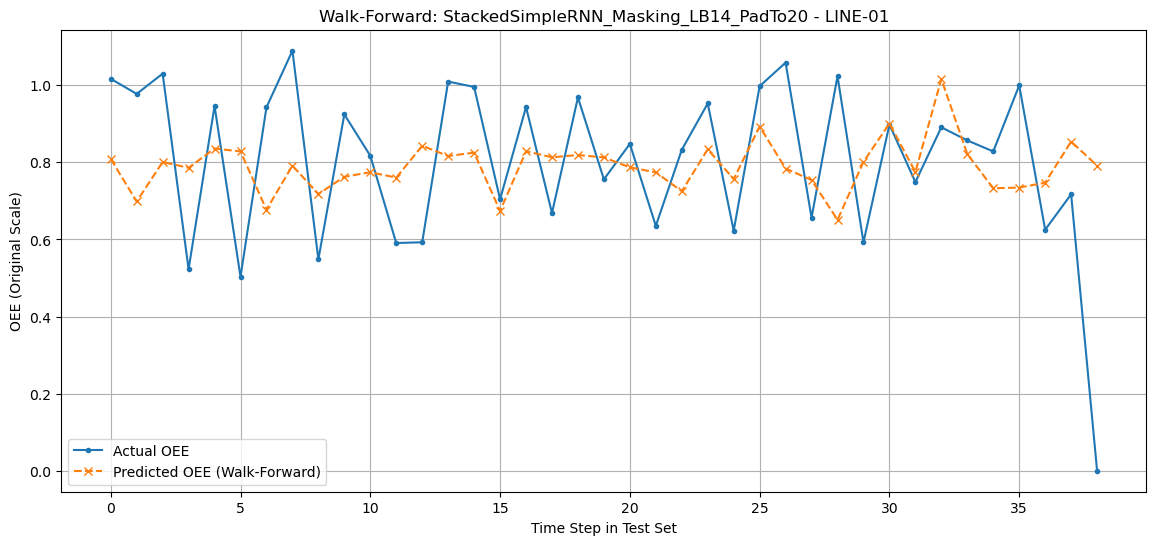



========================= PROCESSING SOURCE: LINE-02 =========================

--- Evaluating StackedSimpleRNN_Masking_LB14_PadTo20 with Walk-Forward for LINE-02 ---


C:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\core\masking.py:47: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



StackedSimpleRNN_Masking_LB14_PadTo20 - Walk-Forward Metrics (Original Scale) for LINE-02:
  MAE: 0.0000, RMSE: 0.0000, MAPE: 0.00%


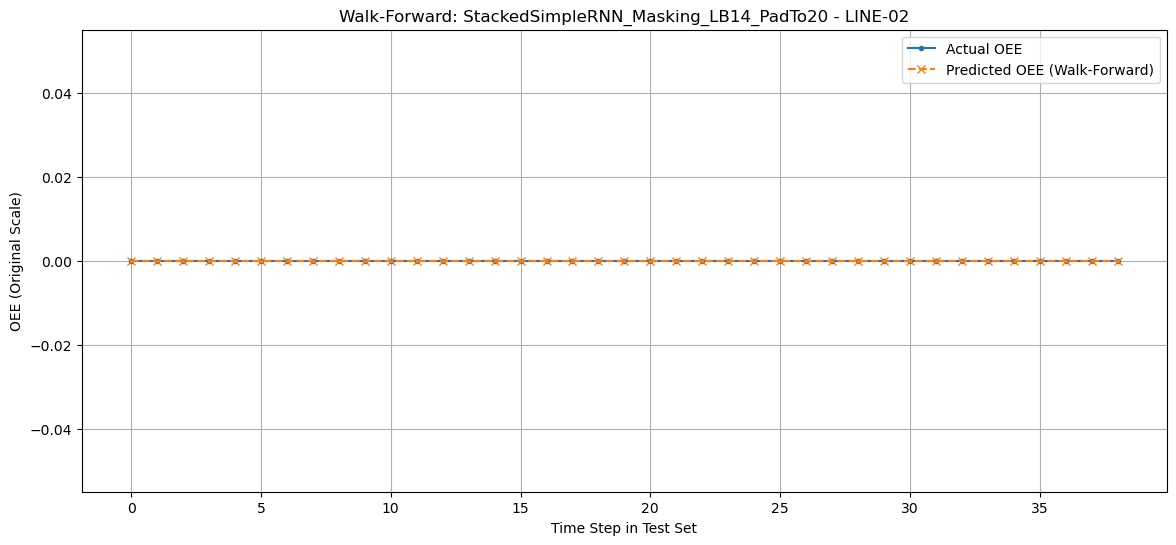



========================= PROCESSING SOURCE: LINE-03 =========================

--- Evaluating StackedSimpleRNN_Masking_LB14_PadTo20 with Walk-Forward for LINE-03 ---


C:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\core\masking.py:47: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



StackedSimpleRNN_Masking_LB14_PadTo20 - Walk-Forward Metrics (Original Scale) for LINE-03:
  MAE: 0.0566, RMSE: 0.1207, MAPE: 10.21%


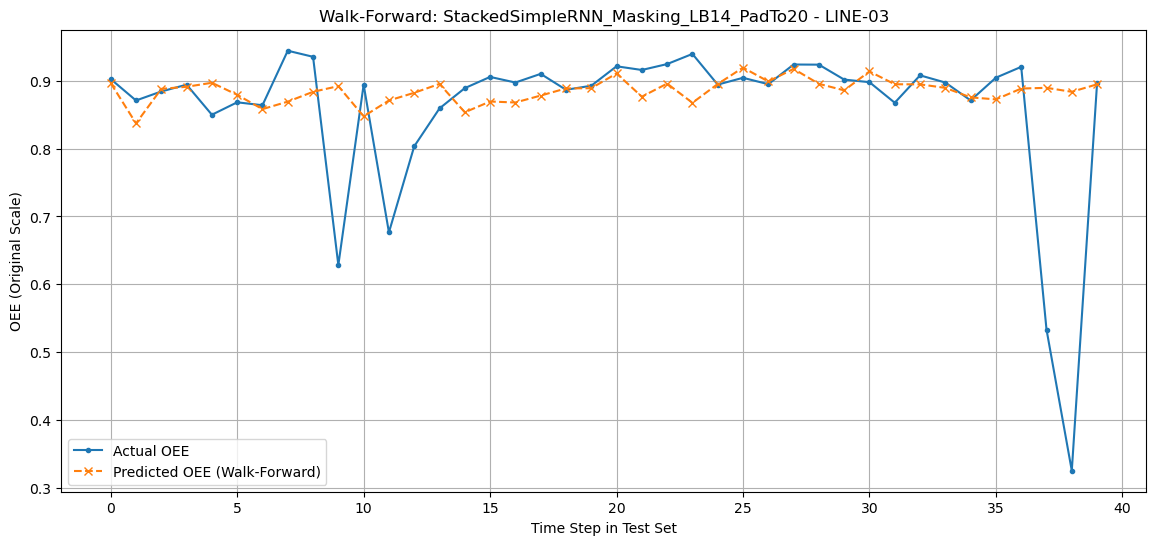



========================= PROCESSING SOURCE: LINE-04 =========================

--- Evaluating StackedSimpleRNN_Masking_LB14_PadTo20 with Walk-Forward for LINE-04 ---


C:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\core\masking.py:47: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # For styling plots
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, Masking
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Ensure RobustScaler or whichever scaler you used is available if needed for inverse transform
# from sklearn.preprocessing import RobustScaler

# --- Assume your data preparation script has run and all_prepared_data is populated ---
# And your create_sequences function is defined.
# And df_overall and per_line_dataframes are loaded if needed for context.

# --- Model Definition (as you provided) ---
# Ensure FORECAST_HORIZON is defined globally or passed to the model builder
FORECAST_HORIZON = 1 # From your data prep for walk-forward

def build_stacked_simplernn_with_masking(input_shape_padded, units_list=[64, 32], dropout_rate=0.25): # Example units/dropout
    """Builds a stacked SimpleRNN model WITH a Masking layer."""
    model = Sequential(name=f"StackedSimpleRNN_Masking_Units{'_'.join(map(str, units_list))}")
    model.add(Masking(mask_value=0., input_shape=input_shape_padded))
    for i, units in enumerate(units_list):
        is_last_rnn_in_stack = (i == len(units_list) - 1)
        model.add(SimpleRNN(
            units, activation='tanh',
            return_sequences=not is_last_rnn_in_stack
        ))
        model.add(Dropout(dropout_rate))
    model.add(Dense(FORECAST_HORIZON, activation='linear'))
    return model

# --- Helper: create_sequences (ensure this is defined as in your data prep) ---
# def create_sequences(data_1d, look_back, forecast_horizon=1):
#     X, y = [], []
#     if len(data_1d) <= look_back + forecast_horizon -1 :
#         return np.array(X), np.array(y)
#     for i in range(len(data_1d) - look_back - forecast_horizon + 1):
#         input_seq = data_1d[i:(i + look_back)]
#         # For single step (horizon=1), output is a single value
#         output_val = data_1d[i + look_back + forecast_horizon -1]
#         X.append(input_seq)
#         y.append(output_val)
#     X = np.array(X)
#     if X.ndim == 2 and X.size > 0:
#         X = X.reshape((X.shape[0], X.shape[1], 1)) # N_FEATURES = 1
#     return X, np.array(y) # y should be 1D for single step output


# --- Helper function to calculate MAPE safely (if you use it) ---
def mean_absolute_percentage_error_safe(y_true, y_pred, epsilon=1e-8):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / (np.maximum(np.abs(y_true), epsilon)))) * 100


# --- Walk-Forward Validation Function (Adapted for Padded Sequences) ---
def evaluate_walk_forward_for_padded_model(
    model_builder_func, # Lambda that takes (input_shape_padded)
    model_name_prefix,
    train_scaled_1d, val_scaled_1d, test_scaled_1d, # 1D scaled arrays
    original_look_back, # The look_back used for create_sequences BEFORE padding
    target_padded_length, # The length to pad sequences TO
    scaler_obj,
    epochs_wf, batch_size_wf, verbose_fit_wf,
    line_name_context,
    n_features=1): # Add n_features

    full_model_name = f"{model_name_prefix}_LB{original_look_back}_PadTo{target_padded_length}"
    print(f"\n--- Evaluating {full_model_name} with Walk-Forward for {line_name_context} ---")

    initial_history_scaled = np.concatenate([train_scaled_1d, val_scaled_1d])
    predictions_scaled_list = []
    actuals_scaled_list = []

    early_stopping_wf = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True, verbose=0)
    reduce_lr_wf = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=5, min_lr=1e-6, verbose=0)

    for i in range(len(test_scaled_1d)): # Iterate over each point in the test set
        current_train_window_1d_scaled = np.concatenate([initial_history_scaled, test_scaled_1d[:i]])

        # 1. Create original sequences from the current walk-forward training window
        X_current_train_orig_seq, y_current_train = create_sequences(
            current_train_window_1d_scaled, original_look_back, FORECAST_HORIZON
        )

        if X_current_train_orig_seq.shape[0] == 0:
            print(f"  Skipping WF step {i+1}, not enough history ({len(current_train_window_1d_scaled)}) "
                  f"for look_back {original_look_back}.")
            if len(test_scaled_1d) > i:
                 actuals_scaled_list.append(test_scaled_1d[i])
                 predictions_scaled_list.append(np.nan)
            continue

        # 2. Pad these original sequences
        X_train_to_pad = np.squeeze(X_current_train_orig_seq, axis=-1) if X_current_train_orig_seq.ndim == 3 and X_current_train_orig_seq.shape[-1] == 1 else X_current_train_orig_seq
        X_current_train_padded = pad_sequences(X_train_to_pad, maxlen=target_padded_length, padding='pre', truncating='pre', dtype='float32', value=0.0)
        X_current_train_padded = X_current_train_padded.reshape((X_current_train_padded.shape[0], target_padded_length, n_features))

        # print(f"  WF step {i+1}/{len(test_scaled_1d)}: Training on {len(X_current_train_padded)} padded sequences.")
        tf.keras.backend.clear_session() # Good practice for loops building models
        model = model_builder_func((target_padded_length, n_features))
        model.compile(optimizer=Adam(learning_rate=0.001), loss=Huber(), metrics=['mae']) # Fixed LR for this WF eval

        model.fit(X_current_train_padded, y_current_train, epochs=epochs_wf, batch_size=batch_size_wf,
                  callbacks=[early_stopping_wf, reduce_lr_wf], verbose=verbose_fit_wf)

        # 3. Prepare the last sequence for prediction (original look_back, then pad)
        last_sequence_data_orig = current_train_window_1d_scaled[-original_look_back:]
        # Squeeze before padding if it's 1D coming from current_train_window_1d_scaled
        last_sequence_to_pad = last_sequence_data_orig.reshape(1, -1) # Make it (1, original_look_back)
        last_sequence_for_pred_padded = pad_sequences(last_sequence_to_pad, maxlen=target_padded_length, padding='pre', truncating='pre', dtype='float32', value=0.0)
        last_sequence_for_pred_padded = last_sequence_for_pred_padded.reshape(1, target_padded_length, n_features)

        prediction_scaled = model.predict(last_sequence_for_pred_padded, verbose=0)[0,0] # Assumes single step output
        predictions_scaled_list.append(prediction_scaled)
        actuals_scaled_list.append(test_scaled_1d[i])
        # print(f"    Pred (scaled): {prediction_scaled:.4f}, Actual (scaled): {test_scaled_1d[i]:.4f}")


    predictions_scaled_arr = np.array(predictions_scaled_list).reshape(-1, 1)
    actuals_scaled_arr = np.array(actuals_scaled_list).reshape(-1, 1)
    valid_pred_indices = ~np.isnan(predictions_scaled_arr.flatten())

    if not np.any(valid_pred_indices):
        print("  No valid predictions made during walk-forward. Cannot calculate metrics.")
        return None

    predictions_original_scale = np.full_like(predictions_scaled_arr, np.nan, dtype=float)
    predictions_original_scale[valid_pred_indices] = scaler_obj.inverse_transform(predictions_scaled_arr[valid_pred_indices])
    actuals_original_scale = scaler_obj.inverse_transform(actuals_scaled_arr) # Actuals should be complete

    final_predictions = predictions_original_scale[valid_pred_indices].flatten()
    final_actuals = actuals_original_scale[valid_pred_indices].flatten() # Use same valid indices for alignment

    if len(final_actuals) == 0 or len(final_predictions) == 0:
        print("  Not enough valid actuals or predictions to calculate metrics.")
        return None

    mae = mean_absolute_error(final_actuals, final_predictions)
    rmse = np.sqrt(mean_squared_error(final_actuals, final_predictions))
    mape = mean_absolute_percentage_error_safe(final_actuals, final_predictions)

    print(f"\n{full_model_name} - Walk-Forward Metrics (Original Scale) for {line_name_context}:")
    print(f"  MAE: {mae:.4f}, RMSE: {rmse:.4f}, MAPE: {mape:.2f}%")

    # Plotting
    plt.figure(figsize=(14, 6))
    # Create date index for plotting if test_dates are available and match length
    time_steps_plot = np.arange(len(final_actuals))
    plt.plot(time_steps_plot, final_actuals, label='Actual OEE', marker='.', linestyle='-')
    plt.plot(time_steps_plot, final_predictions, label='Predicted OEE (Walk-Forward)', marker='x', linestyle='--')
    plt.title(f'Walk-Forward: {full_model_name} - {line_name_context}')
    plt.xlabel('Time Step in Test Set')
    plt.ylabel('OEE (Original Scale)')
    plt.legend()
    plt.grid(True)
    plt.show()

    return {'mae': mae, 'rmse': rmse, 'mape': mape, 'predictions': final_predictions, 'actuals': final_actuals}


# --- Experiment Configuration ---
# These are from your data preparation output
SELECTED_LOOK_BACK = 14
TARGET_PADDED_LENGTH = 20
N_FEATURES_MODEL = 1 # Univariate input to model

# Walk-forward specific training parameters
EPOCHS_WF = 30
BATCH_SIZE_WF = 32
VERBOSE_FIT_WF = 0 # 0 for silent, 1 for progress bar for each WF fit

# Model specific parameters (can be tuned with Optuna later)
rnn_units_list = [64, 32] # Example
rnn_dropout_rate = 0.25  # Example

# --- Main Loop to Run Walk-Forward for Each Data Source ---
all_walk_forward_results = {}

if 'all_prepared_data' not in locals() or not all_prepared_data:
    print("Error: `all_prepared_data` is not defined or is empty. Please run the data preparation script first.")
else:
    for source_name, prepared_data in all_prepared_data.items():
        print(f"\n\n{'='*25} PROCESSING SOURCE: {source_name} {'='*25}")

        if not isinstance(prepared_data, dict) or 'scaler' not in prepared_data or \
           'scaled_splits_1d' not in prepared_data:
            print(f"  Skipping {source_name}: Prepared data is incomplete (missing 'scaler' or 'scaled_splits_1d').")
            continue

        scaler_current = prepared_data['scaler']
        scaled_splits = prepared_data['scaled_splits_1d']
        train_1d = scaled_splits.get('train')
        val_1d = scaled_splits.get('val')
        test_1d = scaled_splits.get('test')

        if train_1d is None or val_1d is None or test_1d is None or \
           train_1d.size == 0 or val_1d.size == 0 or test_1d.size == 0:
            print(f"  Skipping {source_name}: One or more 1D scaled splits (train/val/test) are missing or empty.")
            continue

        # Check if specific look_back and padded_length from prep match current settings
        # This script assumes data in all_prepared_data[source_name] was prepared with
        # SELECTED_LOOK_BACK and then padded to TARGET_PADDED_LENGTH if you used
        # the "focused" data prep script.
        # If you used the multi-lookback prep script, you'd fetch the right one:
        # data_for_lb = prepared_data.get(SELECTED_LOOK_BACK)
        # if not data_for_lb or data_for_lb.get('padded_length') != TARGET_PADDED_LENGTH:
        #     print(f"  Skipping {source_name}: Data for look_back {SELECTED_LOOK_BACK} padded to {TARGET_PADDED_LENGTH} not found.")
        #     continue
        # (This check is simplified as the previous script now prepares for one specific combo)


        # Define the model builder lambda for this source
        # It uses the TARGET_PADDED_LENGTH for the input_shape
        current_model_builder = lambda input_shape_p: build_stacked_simplernn_with_masking(
            input_shape_padded=input_shape_p,
            units_list=rnn_units_list,
            dropout_rate=rnn_dropout_rate
        )

        wf_metrics = evaluate_walk_forward_for_padded_model(
            model_builder_func=current_model_builder,
            model_name_prefix="StackedSimpleRNN_Masking", # Will append LB and PadTo info
            train_scaled_1d=train_1d,
            val_scaled_1d=val_1d,
            test_scaled_1d=test_1d,
            original_look_back=SELECTED_LOOK_BACK, # This is crucial
            target_padded_length=TARGET_PADDED_LENGTH, # This is crucial
            scaler_obj=scaler_current,
            epochs_wf=EPOCHS_WF,
            batch_size_wf=BATCH_SIZE_WF,
            verbose_fit_wf=VERBOSE_FIT_WF,
            line_name_context=source_name,
            n_features=N_FEATURES_MODEL
        )

        if source_name not in all_walk_forward_results:
            all_walk_forward_results[source_name] = {}
        model_id = f"StackedSimpleRNN_Masking_LB{SELECTED_LOOK_BACK}_PadTo{TARGET_PADDED_LENGTH}"
        all_walk_forward_results[source_name][model_id] = wf_metrics

# --- Print Final Summary ---
print("\n\n{'='*30} FINAL WALK-FORWARD VALIDATION SUMMARY {'='*30}")
for source_name, source_results in all_walk_forward_results.items():
    print(f"\n--- Results for Source: {source_name} ---")
    for model_key, metrics in source_results.items():
        if metrics:
            print(f"  Model Configuration: {model_key}")
            print(f"    MAE: {metrics['mae']:.4f}, RMSE: {metrics['rmse']:.4f}, MAPE: {metrics['mape']:.2f}%")
        else:
            print(f"  Model Configuration: {model_key} - Evaluation failed or no valid predictions.")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # For styling plots
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout # Masking is not used here
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, mean_squared_error
# from sklearn.preprocessing import RobustScaler # Ensure your scaler is available

# --- Assume your data preparation script has run and all_prepared_data is populated ---
# And your create_sequences function is defined.

# --- Model Definition (No Masking) ---
FORECAST_HORIZON = 1 # Critical for current walk-forward single-step prediction

def build_stacked_simplernn_no_masking(input_shape_padded, units_list=[50, 30], dropout_rate=0.2):
    """Builds a stacked SimpleRNN model WITHOUT a Masking layer."""
    model = Sequential(name=f"StackedSimpleRNN_NoMask_Units{'_'.join(map(str, units_list))}")
    model.add(SimpleRNN(
        units_list[0], activation='tanh',
        input_shape=input_shape_padded,
        return_sequences=True if len(units_list) > 1 else False
    ))
    model.add(Dropout(dropout_rate))
    for i in range(1, len(units_list)):
        is_last_rnn_in_stack = (i == len(units_list) - 1)
        model.add(SimpleRNN(
            units_list[i], activation='tanh',
            return_sequences=not is_last_rnn_in_stack
        ))
        model.add(Dropout(dropout_rate))
    model.add(Dense(FORECAST_HORIZON, activation='linear'))
    return model

# --- Helper: create_sequences (ensure this is defined as in your data prep) ---
# def create_sequences(data_1d, look_back, forecast_horizon=1):
#     X, y = [], []
#     if len(data_1d) <= look_back + forecast_horizon -1 : # Corrected condition
#         return np.array(X), np.array(y)
#     for i in range(len(data_1d) - look_back - forecast_horizon + 1):
#         input_seq = data_1d[i:(i + look_back)]
#         output_val = data_1d[i + look_back + forecast_horizon -1] # Correct for FH=1
#         X.append(input_seq)
#         y.append(output_val)
#     X = np.array(X)
#     if X.ndim == 2 and X.size > 0:
#         X = X.reshape((X.shape[0], X.shape[1], 1)) # N_FEATURES = 1
#     return X, np.array(y)


# --- Helper function to calculate MAPE safely (if you use it) ---
def mean_absolute_percentage_error_safe(y_true, y_pred, epsilon=1e-8):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / (np.maximum(np.abs(y_true), epsilon)))) * 100


# --- Walk-Forward Validation Function (Adapted for Padded Sequences) ---
# This function is the same as the one you provided in the previous interaction,
# which correctly handles passing input_shape as a positional argument.
def evaluate_walk_forward_for_padded_model(
    model_builder_func, # Lambda that takes ONE POSITIONAL ARG: (input_shape_padded_tuple)
    model_name_prefix,
    train_scaled_1d, val_scaled_1d, test_scaled_1d,
    original_look_back,
    target_padded_length,
    scaler_obj,
    epochs_wf, batch_size_wf, verbose_fit_wf,
    line_name_context,
    n_features=1):

    full_model_name = f"{model_name_prefix}_LB{original_look_back}_PadTo{target_padded_length}"
    print(f"\n--- Evaluating {full_model_name} with Walk-Forward for {line_name_context} ---")

    initial_history_scaled = np.concatenate([train_scaled_1d, val_scaled_1d])
    predictions_scaled_list = []
    actuals_scaled_list = []

    early_stopping_wf = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True, verbose=0)
    reduce_lr_wf = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=5, min_lr=1e-6, verbose=0)

    for i in range(len(test_scaled_1d)):
        current_train_window_1d_scaled = np.concatenate([initial_history_scaled, test_scaled_1d[:i]])
        X_current_train_orig_seq, y_current_train = create_sequences(
            current_train_window_1d_scaled, original_look_back, FORECAST_HORIZON
        )

        if X_current_train_orig_seq.shape[0] == 0:
            if len(test_scaled_1d) > i:
                 actuals_scaled_list.append(test_scaled_1d[i])
                 predictions_scaled_list.append(np.nan)
            continue

        X_train_to_pad = np.squeeze(X_current_train_orig_seq, axis=-1) if X_current_train_orig_seq.ndim == 3 and X_current_train_orig_seq.shape[-1] == 1 else X_current_train_orig_seq
        X_current_train_padded = pad_sequences(X_train_to_pad, maxlen=target_padded_length, padding='pre', truncating='pre', dtype='float32', value=0.0)
        X_current_train_padded = X_current_train_padded.reshape((X_current_train_padded.shape[0], target_padded_length, n_features))

        tf.keras.backend.clear_session()
        model = model_builder_func((target_padded_length, n_features)) # Pass as positional
        model.compile(optimizer=Adam(learning_rate=0.001), loss=Huber(), metrics=['mae'])

        model.fit(X_current_train_padded, y_current_train, epochs=epochs_wf, batch_size=batch_size_wf,
                  callbacks=[early_stopping_wf, reduce_lr_wf], verbose=verbose_fit_wf)

        last_sequence_data_orig = current_train_window_1d_scaled[-original_look_back:]
        last_sequence_to_pad = last_sequence_data_orig.reshape(1, -1)
        last_sequence_for_pred_padded = pad_sequences(last_sequence_to_pad, maxlen=target_padded_length, padding='pre', truncating='pre', dtype='float32', value=0.0)
        last_sequence_for_pred_padded = last_sequence_for_pred_padded.reshape(1, target_padded_length, n_features)

        prediction_scaled = model.predict(last_sequence_for_pred_padded, verbose=0)[0,0]
        predictions_scaled_list.append(prediction_scaled)
        actuals_scaled_list.append(test_scaled_1d[i])

    predictions_scaled_arr = np.array(predictions_scaled_list).reshape(-1, 1)
    actuals_scaled_arr = np.array(actuals_scaled_list).reshape(-1, 1)
    valid_pred_indices = ~np.isnan(predictions_scaled_arr.flatten())

    if not np.any(valid_pred_indices):
        print("  No valid predictions made during walk-forward. Cannot calculate metrics.")
        return None

    predictions_original_scale = np.full_like(predictions_scaled_arr, np.nan, dtype=float)
    predictions_original_scale[valid_pred_indices] = scaler_obj.inverse_transform(predictions_scaled_arr[valid_pred_indices])
    actuals_original_scale = scaler_obj.inverse_transform(actuals_scaled_arr)

    final_predictions = predictions_original_scale[valid_pred_indices].flatten()
    final_actuals = actuals_original_scale[valid_pred_indices].flatten()

    if len(final_actuals) == 0 or len(final_predictions) == 0:
        print("  Not enough valid actuals or predictions to calculate metrics.")
        return None

    mae = mean_absolute_error(final_actuals, final_predictions)
    rmse = np.sqrt(mean_squared_error(final_actuals, final_predictions))
    mape = mean_absolute_percentage_error_safe(final_actuals, final_predictions)

    print(f"\n{full_model_name} - Walk-Forward Metrics (Original Scale) for {line_name_context}:")
    print(f"  MAE: {mae:.4f}, RMSE: {rmse:.4f}, MAPE: {mape:.2f}%")

    plt.figure(figsize=(14, 6))
    time_steps_plot = np.arange(len(final_actuals))
    plt.plot(time_steps_plot, final_actuals, label='Actual OEE', marker='.', linestyle='-')
    plt.plot(time_steps_plot, final_predictions, label='Predicted OEE (Walk-Forward)', marker='x', linestyle='--')
    plt.title(f'Walk-Forward: {full_model_name} - {line_name_context}')
    plt.xlabel('Time Step in Test Set')
    plt.ylabel('OEE (Original Scale)')
    plt.legend()
    plt.grid(True)
    plt.show()

    return {'mae': mae, 'rmse': rmse, 'mape': mape, 'predictions': final_predictions, 'actuals': final_actuals}


# --- Experiment Configuration ---
SELECTED_LOOK_BACK = 7     # Your desired original look_back
TARGET_PADDED_LENGTH = 35  # Your desired final padded length
N_FEATURES_MODEL = 1       # Univariate input to model

if TARGET_PADDED_LENGTH < SELECTED_LOOK_BACK:
    raise ValueError(f"TARGET_PADDED_LENGTH ({TARGET_PADDED_LENGTH}) must be >= SELECTED_LOOK_BACK ({SELECTED_LOOK_BACK})")


# Walk-forward specific training parameters
EPOCHS_WF = 40 # Can adjust
BATCH_SIZE_WF = 16 # Can adjust
VERBOSE_FIT_WF = 0

# Model specific parameters for build_stacked_simplernn_no_masking
# You can change these or later use Optuna to find optimal ones
rnn_units_list_no_mask = [64, 32] # Example units
rnn_dropout_rate_no_mask = 0.2   # Example dropout

# --- Main Loop to Run Walk-Forward for Each Data Source ---
all_walk_forward_results_no_masking = {} # Store results for this specific model

if 'all_prepared_data' not in locals() or not all_prepared_data:
    print("Error: `all_prepared_data` is not defined or is empty. Please run the data preparation script first.")
    print("Ensure data is prepared with SELECTED_LOOK_BACK and TARGET_PADDED_LENGTH as defined above.")
else:
    for source_name, prepared_data in all_prepared_data.items():
        print(f"\n\n{'='*25} PROCESSING SOURCE (No Masking Model): {source_name} {'='*25}")

        if not isinstance(prepared_data, dict) or \
           'scaler' not in prepared_data or \
           'scaled_splits_1d' not in prepared_data:
            print(f"  Skipping {source_name}: Prepared data is incomplete.")
            continue

        # Check if the data was prepared with the CURRENTLY desired SELECTED_LOOK_BACK and TARGET_PADDED_LENGTH
        # This relies on how your 'all_prepared_data' was structured by the "focused" prep script.
        if prepared_data.get('selected_look_back') != SELECTED_LOOK_BACK or \
           prepared_data.get('target_padded_length') != TARGET_PADDED_LENGTH:
            print(f"  Skipping {source_name}: Data in 'all_prepared_data' was not prepared with "
                  f"look_back={SELECTED_LOOK_BACK} and padded_length={TARGET_PADDED_LENGTH}.")
            print(f"  Found: look_back={prepared_data.get('selected_look_back')}, padded_length={prepared_data.get('target_padded_length')}")
            continue

        scaler_current = prepared_data['scaler']
        scaled_splits = prepared_data['scaled_splits_1d']
        train_1d = scaled_splits.get('train')
        val_1d = scaled_splits.get('val')
        test_1d = scaled_splits.get('test')

        if train_1d is None or val_1d is None or test_1d is None or \
           train_1d.size == 0 or val_1d.size == 0 or test_1d.size == 0:
            print(f"  Skipping {source_name}: 1D scaled splits are missing or empty.")
            continue

        # Define the model builder lambda for this source
        current_model_builder = lambda input_shape_p: build_stacked_simplernn_no_masking(
            input_shape_padded=input_shape_p, # This will be (TARGET_PADDED_LENGTH, N_FEATURES_MODEL)
            units_list=rnn_units_list_no_mask,
            dropout_rate=rnn_dropout_rate_no_mask
        )

        wf_metrics = evaluate_walk_forward_for_padded_model(
            model_builder_func=current_model_builder,
            model_name_prefix="StackedSimpleRNN_NoMasking",
            train_scaled_1d=train_1d,
            val_scaled_1d=val_1d,
            test_scaled_1d=test_1d,
            original_look_back=SELECTED_LOOK_BACK, # The actual look_back used for sequencing
            target_padded_length=TARGET_PADDED_LENGTH, # The length sequences are padded to
            scaler_obj=scaler_current,
            epochs_wf=EPOCHS_WF,
            batch_size_wf=BATCH_SIZE_WF,
            verbose_fit_wf=VERBOSE_FIT_WF,
            line_name_context=source_name,
            n_features=N_FEATURES_MODEL
        )

        if source_name not in all_walk_forward_results_no_masking:
            all_walk_forward_results_no_masking[source_name] = {}
        # Use a unique key reflecting the specific parameters
        model_id = f"StackedSimpleRNN_NoMask_LB{SELECTED_LOOK_BACK}_PadTo{TARGET_PADDED_LENGTH}"
        all_walk_forward_results_no_masking[source_name][model_id] = wf_metrics

# --- Print Final Summary ---
print("\n\n{'='*30} FINAL WALK-FORWARD VALIDATION SUMMARY (No Masking Model) {'='*30}")
for source_name, source_results in all_walk_forward_results_no_masking.items():
    print(f"\n--- Results for Source: {source_name} ---")
    for model_key, metrics in source_results.items():
        if metrics:
            print(f"  Model Configuration: {model_key}")
            print(f"    MAE: {metrics['mae']:.4f}, RMSE: {metrics['rmse']:.4f}, MAPE: {metrics['mape']:.2f}%")
        else:
            print(f"  Model Configuration: {model_key} - Evaluation failed or no valid predictions.")



========================= PROCESSING SOURCE (No Masking Model): Overall =========================

--- Evaluating StackedSimpleRNN_NoMasking_LB7_PadTo35 with Walk-Forward for Overall ---


C:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
